In [1]:
import numpy as np

x_file = open("q4x.dat","r")

x0_list=[]
x1_list=[]


for line in x_file:
    x0_list.append(float(line.split(" ")[0]))
    x1_list.append(float(line.split(" ")[2].split("\n")[0]))
    #print(line.split(" ")[2])

    

#print(x0_list,x1_list)

x0_vec = np.array([ x0_list ]).T
x1_vec = np.array([ x1_list ]).T

x_vec = x0_vec
x_vec = np.append(x_vec,x1_vec, axis = 1)

y_list=[]

y_file = open("q4y.dat","r")
for line in y_file:
    class_type = line.split("\n")[0]
    #print(line.split("\n")[0])
    if  "Alaska" in class_type:
        y_list.append(0)
    else:
        y_list.append(1)

#print(y_list)      
y_vec = np.array([ y_list ]).T

print(x_vec.shape,y_vec.shape)

(100, 2) (100, 1)


In [2]:
#Normalizing X feature

x0_mean = np.mean(x_vec[:,0:1])
x1_mean = np.mean(x_vec[:,1:2])
print(x0_mean,x1_mean)
#print(x_vec[:,1:2])

x0_std = np.std(x_vec[:,0:1])
x1_std = np.std(x_vec[:,1:2])


x_vec[:,0:1] = (x_vec[:,0:1] - x0_mean)/x0_std 
x_vec[:,1:2] = (x_vec[:,1:2] - x1_mean)/x1_std 

# print(x_vec[:4])

117.92 398.14


In [3]:
# Alaska : 0         Canada : 1

m = len(x_vec)

phi = y_vec.T @ y_vec / m
phi = phi[0][0]
print("phi",phi)

mu_0 = ((1-y_vec.T) @ x_vec).T
label_1 =  (y_vec.T @ y_vec)
num_one_class = label_1[0][0]
num_zero_class = m - num_one_class
mu_0 = mu_0/ num_zero_class
print("mu_0",mu_0)

mu_1 = ((y_vec.T) @ x_vec).T

mu_1 = mu_1/ num_one_class
print("mu_1",mu_1)



    



phi 0.5
mu_0 [[-0.75529433]
 [ 0.68509431]]
mu_1 [[ 0.75529433]
 [-0.68509431]]


In [4]:

temp = np.zeros((x_vec.shape[1],x_vec.shape[1]))
print(x_vec[0].reshape(2,1))
for i in range(m):
    #print((y_vec[i] * mu_0).shape)
    #print( ( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ) )
    temp+= ( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ) @ ( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ).T
    
sigma = temp/m
print("sigma",sigma)





[[-0.38344523]
 [-0.65509969]]
sigma [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


In [5]:
# Plotting data

import matplotlib.pyplot as plt



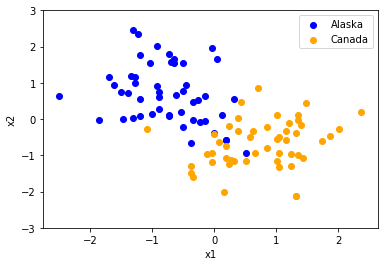

In [6]:
x0_class0 = x_vec[:50,0]
x1_class0 = x_vec[:50,1]

x0_class1 = x_vec[50:100,0]
x1_class1 = x_vec[50:100,1]


plt.scatter(x0_class0,x1_class0,label="Alaska",color='blue')
plt.scatter(x0_class1,x1_class1,label="Canada",color = 'orange')
plt.ylim(-3,3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()



In [7]:
import math
#real value

sigma_inv = np.linalg.inv(sigma)

theta_0 =  math.log(phi/(1-phi)) -1/2.0*( mu_1.T@ sigma_inv@mu_1 - mu_0.T@ sigma_inv@mu_0  )

theta_1_2 = sigma_inv @ mu_1 - sigma_inv @ mu_0

theta = np.append(theta_0,theta_1_2,axis = 0)
print(theta)



[[ 1.11022302e-15]
 [ 3.38925452e+00]
 [-2.43858399e+00]]


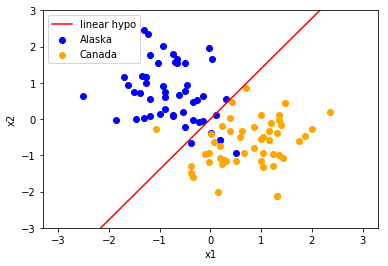

In [8]:

x_axis = np.linspace(-3,3,100)

slope = - theta[1]/theta[2]
intercept = -theta[0]/theta[2]
y_axis = slope*x_axis + intercept

plt.scatter(x0_class0,x1_class0,label="Alaska",color='blue')
plt.scatter(x0_class1,x1_class1,label="Canada",color = 'orange')
plt.plot(x_axis, y_axis, '-r', label='linear hypo')
plt.ylim(-3,3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

In [9]:


temp = np.zeros((x_vec.shape[1],x_vec.shape[1]))
print(x_vec[0].reshape(2,1))
for i in range(m):
    #print((y_vec[i] * mu_0).shape)
    #print( ( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ) )
    temp+= ( 1-y_vec[i] )*( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ) @ ( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ).T
    
sigma_0 = temp/num_zero_class


temp = np.zeros((x_vec.shape[1],x_vec.shape[1]))
print(x_vec[0].reshape(2,1))
for i in range(m):
    #print((y_vec[i] * mu_0).shape)
    #print( ( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ) )
    temp+= ( y_vec[i] )*( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ) @ ( x_vec[i].reshape(2,1) -  ( y_vec[i] * mu_1 + (1-y_vec[i])*mu_0) ).T
    
sigma_1 = temp/num_one_class

print(sigma_0)
print(sigma_1)

[[-0.38344523]
 [-0.65509969]]
[[-0.38344523]
 [-0.65509969]]
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


In [10]:
# Quadaratic equations finding coeffients of ax^2 + bx + c = 0

sigma_0_inv = np.linalg.inv(sigma_0)
sigma_1_inv = np.linalg.inv(sigma_1)

# 2x2
alpha = -(1/2.0)*( sigma_1_inv - sigma_0_inv )

# 2x1
beta = sigma_1_inv @ mu_1 - sigma_0_inv @ mu_0


sigma_0_det = np.linalg.det(sigma_0)
sigma_1_det = np.linalg.det(sigma_1)

# 1x1
gamma = (-1/2.0)*( mu_1.T@sigma_1_inv@mu_1  -  mu_0.T@sigma_0_inv@mu_0 ) +  math.log(phi/(1-phi)) + math.log( sigma_0_det/sigma_1_det )

print(alpha)
print(beta[0][0])
print(gamma)




[[ 0.3356739   0.64341817]
 [ 0.64341817 -0.43296599]]
3.8078531935404865
[[-0.49198061]]


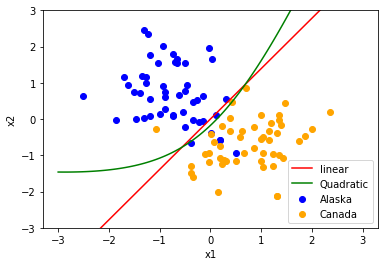

In [12]:
x1 = np.linspace(-3,3,100)


A = alpha[1][1]

B = ( alpha[0][1] + alpha[1][0] )*x1 + beta[1][0]


C = alpha[0][0]*(x1.T*x1) + beta[0][0]*x1 + gamma[0][0]


x2 =[]

for i, x_val in enumerate(x1):
    x2.append( (-B[i] - math.sqrt( B[i]*B[i] - 4*A*C[i] ))/( 2*A ) )
    
x2 = np.array(x2)


#x2 = (-B + math.sqrt( B*B - 4*A*C ))/( 2*A )

plt.scatter(x0_class0,x1_class0,label="Alaska",color='blue')
plt.scatter(x0_class1,x1_class1,label="Canada",color = 'orange')
plt.plot(x_axis, y_axis, '-r', label='linear')
plt.plot(x1, x2, '-g', label='Quadratic')
plt.ylim(-3,3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()